In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [2]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

# Loading the Dataset

In [3]:
house_data = pd.read_csv('kc_house_data.csv',dtype=dtype_dict)
house_data.shape

(21613, 21)

In [4]:
def get_numpy_data(dataset,features,output):
#     dataset['constant'] = 1
#     features.insert(0,'constant')
    X = np.array(dataset[features])
    Y = np.array(dataset[output]).reshape(-1,1)
    return X,Y
    

In [97]:
def pred_output(X,W,B):
    Y_pred = np.dot(X,W.T) + B #(21613,2) * (2,1) --> (21613,1) + (1,1)  -->(21613,1)
    return np.array(Y_pred) #(21613,1)

In [98]:
def compute_grad(X,W,Y,l2_penalty,B):
    Y_pred = pred_output(X,W,B) #(21613,1)
    dW = (-2 * np.dot((Y - Y_pred).T,X)) + (2 * l2_penalty * W)# (1,21613)* (21613,2) --> (1,2) + (1,2) --> (1,2)
    dB = np.sum((-2 * (Y - Y_pred))) #(1,1)
    return dW,dB
    

In [7]:
X,Y = get_numpy_data(house_data,['sqft_living'],['price'])
print(X.shape,Y.shape)

(21613, 1) (21613, 1)


In [8]:
W = np.array([1.]).reshape(-1,1)
B = np.array([10.]).reshape(-1,1)
print(W.shape,B.shape)
Y_pred = pred_output(X,W,B)
print(Y_pred.shape)
compute_grad(X,W,Y,1,B)

(1, 1) (1, 1)
(21613, 1)


(array([[-5.85644602e+13]]), -23255512010.0)

In [99]:

def grad(X,Y,W,B,learning_rate,l2_penalty,epochs=100):
    converged = False
    loss_arr = []
    param_learned = []
    
    for epoch in range(epochs):
        dW,dB = compute_grad(X,W,Y,l2_penalty,B)
        W -= learning_rate * dW
        B -= learning_rate * dB
        loss = (np.mean(np.square((Y - pred_output(X,W,B))))) ** 0.5
        loss_arr.append(loss)
        
    plt.plot(loss_arr)
    param_learned.append(W)
    param_learned.append(B)
    return param_learned
        

# Spliting into Train-Test

In [73]:
train_data = pd.read_csv('kc_house_train_data.csv',dtype=dtype_dict)
test_data = pd.read_csv('kc_house_test_data.csv',dtype=dtype_dict)
print(train_data.shape,test_data.shape)

(17384, 21) (4229, 21)


In [74]:
X_train,Y_train = get_numpy_data(train_data,['sqft_living'],['price'])
print(X_train.shape,Y_train.shape)

(17384, 1) (17384, 1)


In [83]:
W = np.array([0.]).reshape(-1,1)
B = np.array([0.]).reshape(-1,1)
print(W.shape,B.shape)

(1, 1) (1, 1)


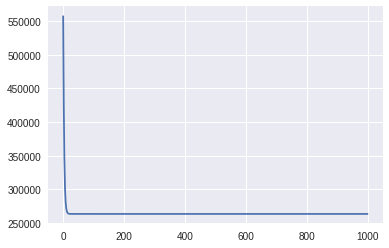

In [84]:
params_simple = grad(X_train,Y_train,W,B,1e-12,0,1000)

In [85]:
params_simple

[array([[263.02436897]]), array([[-0.16311351]])]

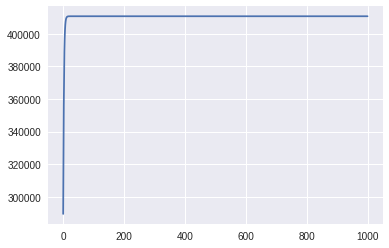

In [78]:
params_high = grad(X_train,Y_train,W,B,1e-12,1e11,1000)

In [79]:
params_high

[array([[124.57221625]]), array([[9.55413222]])]

# Visualizing the 2 models

In [65]:
W_no_regu,B_no_regu

(array([[263.02054959]]), array([[9.34090112]]))

In [66]:
W_l2,B_l2

(array([[263.02054959]]), array([[9.34090112]]))

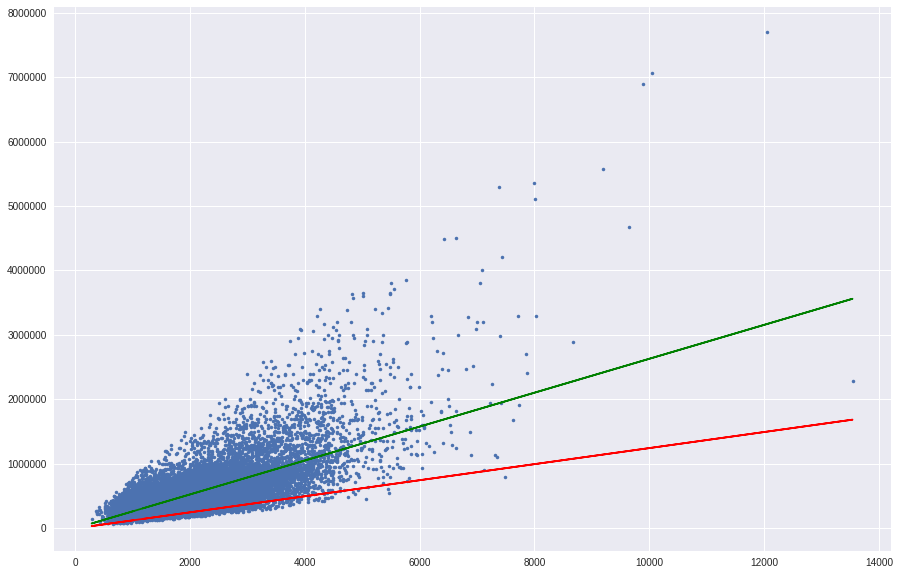

In [91]:
plt.figure(figsize=(15,10))
plt.plot(X,Y,'.')
plt.plot(X,pred_output(X,params_simple[0],params_simple[0]),c='g')
plt.plot(X,pred_output(X,params_high[0],params_high[1]),c='r')
plt.show()

In [ ]:
np.round(W_no_l2,1)

# RSS on Test Data

In [81]:
X_test,Y_test = get_numpy_data(test_data,['sqft_living'],['price'])
print(X_test.shape,Y_test.shape)

(4229, 1) (4229, 1)


In [82]:
W = np.array([0.]).reshape(-1,1)
B = np.array([0.]).reshape(-1,1)

np.sum(np.square(Y_test - pred_output(X_test,W,B)))

1784273286136298.0

In [86]:
W = params_simple[0]
B = params_simple[1]
np.sum(np.square(Y_test - pred_output(X_test,W,B)))

275723632153607.44

In [87]:
W = params_high[0]
B = params_high[1]
np.sum(np.square(Y_test - pred_output(X_test,W,B)))

694642368617594.2

In [90]:
params_high

[array([[124.57221625]]), array([[9.55413222]])]

# Model with 2 features

In [131]:
X_train,Y_train = get_numpy_data(train_data,['sqft_living','sqft_living15'],['price'])
X_train.shape,Y_train.shape

((17384, 2), (17384, 1))

In [132]:
W = np.array([[0.,0.]])
B = np.array([0.]).reshape(-1,1)
print(W.shape,B.shape)

(1, 2) (1, 1)


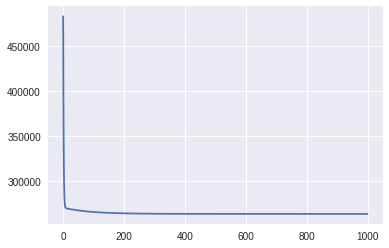

In [133]:
model_2_simple = grad(X_train,Y_train,W,B,1e-12,0,1000)

In [134]:
model_2_simple

[array([[243.05416982,  22.41481497]]), array([[-0.35743483]])]

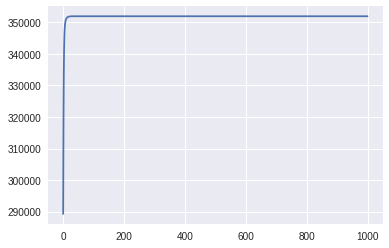

In [136]:
model_2_high = grad(X_train,Y_train,W,B,1e-12,1e11,1000)

In [137]:
model_2_high

[array([[91.48932609, 78.43664063]]), array([[6.35007451]])]

In [126]:
np.round(model_2_simple[0],1)

array([[243.1,  22.4]])

# RSS on Test Data

In [127]:
X_test,Y_test = get_numpy_data(test_data,['sqft_living','sqft_living15'],['price'])
X_test.shape,Y_test.shape

((4229, 2), (4229, 1))

In [128]:
W = np.array([[0.,0.]])
B = np.array([0.]).reshape(-1,1)

np.sum(np.square(Y_test - pred_output(X_test,W,B)))

1784273286136298.0

In [135]:
W = model_2_simple[0]
B = model_2_simple[1]
np.sum(np.square(Y_test - pred_output(X_test,W,B)))

274067615918575.56

In [138]:
W = model_2_high[0]
B = model_2_high[1]
np.sum(np.square(Y_test - pred_output(X_test,W,B)))

500405018079471.56

In [143]:
W = np.array([[243.05416982,  22.41481497]])
B = np.array([-0.35743483]).reshape(-1,1)
print(pred_output(X_test[0],W,B))
print(Y_test[0])
pred_output(X_test[0],W,B) - Y_test[0]


[[387465.47605437]]
[310000.]


array([[77465.47605437]])

In [144]:

W = np.array([[91.48932609, 78.43664063]])
B = np.array([6.35007451]).reshape(-1,1)
print(pred_output(X_test[0],W,B))
print(Y_test[0])
pred_output(X_test[0],W,B) - Y_test[0]

[[270453.30670461]]
[310000.]


array([[-39546.69329539]])

# Questions
15. Quiz Question: What is the value of the coefficient for sqft_living that you learned with no regularization, rounded to 1 decimal place? What about the one with high regularization?
#### ANS: 263.1
16. Quiz Question: Comparing the lines you fit with the with no regularization versus high regularization, which one is steeper?
#### ANS: No regularization
18. Quiz Question: What are the RSS on the test data for each of the set of weights above (initial, no regularization, high regularization)?
#### ANS: 1784273286136298.0 , 275723632153607.44 , 694642368617594.2
22. Quiz Question: What is the value of the coefficient for ‘sqft_living’ that you learned with no regularization, rounded to 1 decimal place? What about the one with high regularization?
#### ANS: 243.1
24. Quiz Question: What are the RSS on the test data for each of the set of weights above (initial, no regularization, high regularization)?
#### ANS: 1784273286136298.0,  274067615918575.56, 500405018079471.56
26. Quiz Question: What's the error in predicting the price of the first house in the test set using the weights learned with no regularization? What about with high regularization?
#### ANS: 77465.47605437 , -39546.69329539